In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import zeros
plt.rcParams['figure.dpi']= 150
# this code is based closely on:
# https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

In [2]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    return x * (1.0 - x)

In [4]:
class NeuralNetwork:
    def __init__(self, x, y, HiddenLayerSize, etaVar):
        self.hls        = HiddenLayerSize
        self.eta        = etaVar
        self.input      = x
        self.y          = y
        self.weights1   = np.random.rand(self.input.shape[1],self.hls) 
        self.weights2   = np.random.rand(self.hls,self.y.shape[1])                 
        self.output     = np.zeros(self.y.shape)

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # use chain rule to get derivative of loss function w.r.t. weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # d(loss)/d(weights) = delta(weights)
        self.weights1 += self.eta*d_weights1
        self.weights2 += self.eta*d_weights2

[[0.01877645]
 [0.97446976]
 [0.98490677]
 [0.02307007]]


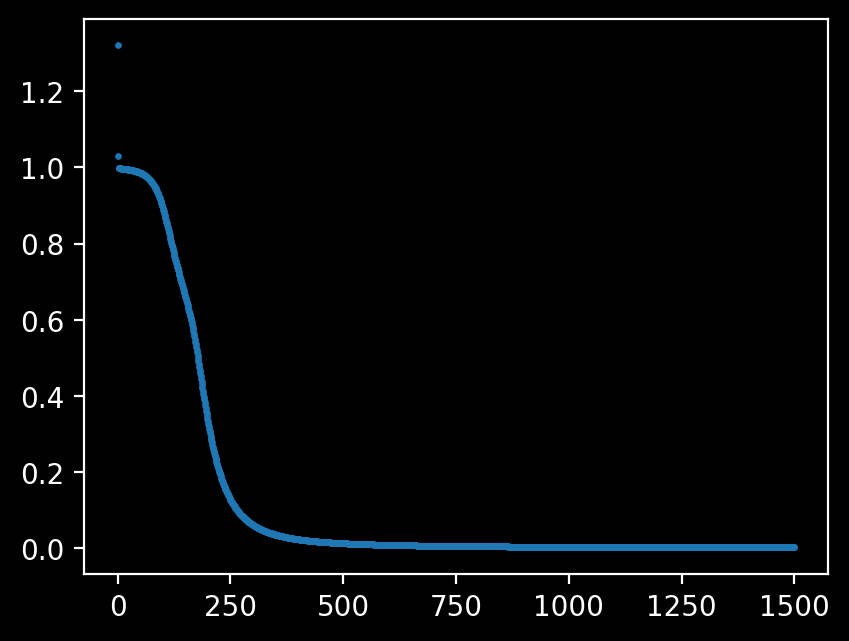

In [6]:
if __name__ == "__main__":
    epochs = 1500
    X = np.array([[0,0,1],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]])
    y = np.array([[0],[1],[1],[0]])
    nn = NeuralNetwork(X,y,4,1)

    iterationCounter=zeros(epochs)
    lossData=zeros(epochs)
    
    for i in range(epochs):
        nn.feedforward()
        nn.backprop()
        iterationCounter[i]=i
        lossData[i]=np.dot(np.matrix.flatten(nn.y)-np.matrix.flatten(nn.output),np.matrix.flatten(nn.y)-np.matrix.flatten(nn.output))

    print(nn.output)
    # print(nn.feedforward())
    # print(X.shape[1])
    # print(np.matrix.flatten(nn.y))
    # print(np.dot(np.matrix.flatten(nn.y)-np.matrix.flatten(nn.output),np.matrix.flatten(nn.y)-np.matrix.flatten(nn.output)))
    # print(iterationCounter[1499]+1)
    # print(lossData[0])
    
    plt.scatter(iterationCounter, lossData, s=2)
    plt.savefig("loss_function_evolution.png", dpi=300)
    plt.show()